# TermProject_Melody 

2019102168 컴퓨터공학과 민병수

어디선가 알게 되어 좋아하던 노래가 있는데, 그 노래 제목이 뭔지 몰라 너무 답답하다시다구요???
그런 당신을 위해 준비했습니다! 당신이 기억하는 멜로디를 토대로 무슨 노래인지를 알려주는 'Melody'!!

현재 작업상황은 셀레니움을 통해 사용자가 가사를 입력하면, 우리나라 최대 음원 사이트인 멜론에서 그에 맞는 노래를 찾아 곡 정보와 가사를 출력하고, 앨범의 사진을 출력하여주는 코드까지 진행됐습니다. 이후, 바이브, 벅스, 플로, 지니 등의 음원사이트로도 연결하여 단순히 그에 맞는 노래를 찾아 출력하는 것이 아닌, 여러 음원 사이트에서 검색결과로 상위로 가장 많이 노출된 것을 찾아 출력하는 코드를 작성할 예정입니다. 만약, 사용자가 알고 있는 가사의 길이가 지나치게 짧다던가, 혹은 잘못 알고 있어서 검색이 되지 않는다던가, 혹은 단순 멜로디만을 알고 있을 경우에는 네이버 지식인에 해당하는 내용을 검색해 찾아주는 방향으로 진행할 생각입니다. 

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas
import time
import requests
from IPython.display import display
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
import random

안녕 이제는 안녕 이 말
['안녕', '안녕 이제는 안녕 (Feat. 윤정오)', '안녕']
곡명 : 안녕 

폴킴
앨범 : 호텔 델루나 OST
발매일 : 2019.08.31
장르 : 발라드, 국내드라마
FLAC : Flac 16/24bit
안녕 이라는 말을해
짧은 시간을 뒤로 한채로
여전히 아프겠지만
하룻밤 자고 나면 사라지는 꿈처럼
너를 oh 잊게될까 두려워져
무심히 널 떠올리게 되면
불안해지는 맘 어떻게 해야하니
안녕 이제는 안녕
이 말 도저히 할 수가 없어
너로 가득찬 내 마음
겨우 내가 할 수 있는 일
너를 사랑하는 거
다시 널 만날 수 있길
아주 오래 전부터 정해진 연일지도
너밖에 모를 내가 되었던 그때가
두려워져 널 안고 있으면
자꾸 욕심이나 어쩔 수 없는걸
안녕 이제는 안녕
이 말 도저히 할 수가 없어
너로 가득찬 내 마음
겨우 내가 할 수 있는 일
너를 사랑하는 거
다시 널 만날 수 있길
굳게 닫힌 저 문이 열리면
그때는 널 다시 볼 수 있을까
잠시 스치듯 만나
운명처럼 날 꽃 피우게 해
매일 널 꿈꾸겠지만
가득 채울 그리움만큼
바라는 건 단 하나
계속 내 곁에 있어줘


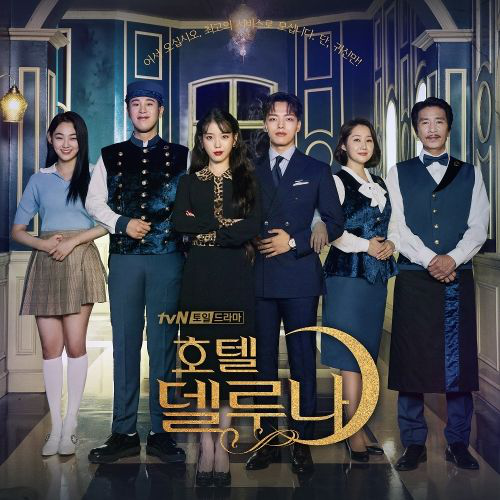

검색을 멈추시려면 0을 입력해주세요.
음음음음랄랄라랄랄

['내가 제일 좋아하는 시간 (feat.김성진, 윤예지)', '동네음악대', '2']
해당 내용이 음원 사이트에 존재하지 않거나 일치하는 노래가 아닐 확률이 높습니다. 네이버 지식인에 해당 내용을 검색합니다.
지식인 URL을 출력합니다. : 
https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=음음음음랄랄라랄랄
검색을 멈추시려면 0을 입력해주세요.
0


In [5]:
driver = webdriver.Chrome('C:\\Users\\qud97\\Desktop\\웹파\\chromedriver')
user = input()
while(user != "0"):
    Music_List = ["0", "1", "2"]
    try:
        driver.get('https://www.melon.com/index.htm')
        driver.implicitly_wait(3)
        search = driver.find_element_by_class_name('ui-autocomplete-input')
        search.send_keys(user)
        driver.find_element_by_xpath('//*[@id="gnb"]/fieldset/button[2]/span').click()
        pageURL_m = driver.page_source
        Soup_m = BeautifulSoup(pageURL_m, 'html.parser')
        Title_m = Soup_m.find("a", {'class' : 'text'})
        Title_m = Title_m.text
        Music_List[0] = Title_m
    except:
        print("")
    try:
        driver.get('https://www.genie.co.kr/search/searchMain?query=' + user)
        pageURL_g = driver.page_source
        Soup_g = BeautifulSoup(pageURL_g, 'html.parser')
        Title_g = Soup_g.find("a", {'class' : 'title ellipsis'})
        Title_g = Title_g.text
        Title_g = Title_g.strip()
        if(Title_g[0:5] == "TITLE"):
            Title_g = Title_g[5:]
            Title_g = Title_g.strip()
        Music_List[1] = Title_g
    except:
        print("")
    try:
        driver.get('https://music.bugs.co.kr/search/integrated?q=' + user)
        pageURL_b = driver.page_source
        Soup_b = BeautifulSoup(pageURL_b, 'html.parser')
        Title_b = Soup_b.find("p", {'class' : 'title'})
        Title_b = Title_b.text.strip()
        Music_List[2] = Title_b
    except:
        print("")
    print(Music_List)
    Music_List1= []
    for i in range(len(Music_List)):
        Music_List1.append(Music_List[i].upper())
    Music_check = [0,0,0]
    index = 0
    for i in range(0,3):
        Music_check[i] = Music_List1.count(Music_List1[i])
    if(Music_check[0] == 3):
        index = random.randint(0,2)
    elif(max(Music_check) == 1):
        print("해당 내용이 음원 사이트에 존재하지 않거나 일치하는 노래가 아닐 확률이 높습니다. 네이버 지식인에 해당 내용을 검색합니다.")
        print("지식인 URL을 출력합니다. : " )
        print('https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=' + user)
        print("검색을 멈추시려면 0을 입력해주세요.")
        user = input()
        continue
    elif(max(Music_check) == 2):
        index1 = Music_check.index(1)
        newlist = []
        for i in range(0,3):
            if(i != index1):
                newlist.append(i)
        random.shuffle(newlist)
        index = newlist[0]
    if(index == 0):
        driver.get('https://www.melon.com/index.htm')
        driver.implicitly_wait(3)
        search = driver.find_element_by_class_name('ui-autocomplete-input')
        search.send_keys(user)
        driver.find_element_by_xpath('//*[@id="gnb"]/fieldset/button[2]/span').click()
        driver.find_element_by_xpath('//*[@id="divCollection"]/ul/li[6]/a').click()
        driver.find_element_by_xpath('//*[@id="pageList"]/div/ul/li[1]/dl/dt/a[1]').click()
        pageURL = driver.page_source
        Soup = BeautifulSoup(pageURL, 'html.parser')
        Title = Soup.find("div", {'class' : 'song_name'})
        Title = Title.text.split()
        real_Title = ""
        for i in range(len(Title)):
            if(i == 0):
                print(Title[0] + " :", end = ' ')
            else:
                print(Title[i] , end= ' ')
                real_Title += Title[i] + ' '
        print("\n")
        try:
            artist = Soup.find("a", {'class' : 'artist_name'})
            name = artist.find("span")
            print(name.text)
        except:
            print("")
        Info = Soup.find("dl", {'class' : 'list'})
        Info_1 = Info.find_all("dt")
        Info_2 = Info.find_all("dd")
        for i in range(len(Info_1)):
            print(Info_1[i].text + " : " + Info_2[i].text)
        lyric = driver.find_element_by_class_name('lyric')
        print(lyric.text)
        img = Soup.find("a",{'class' : 'image_typeAll'})
        imgURL = img.find("img")["src"]
        with urlopen(imgURL) as F1:
            with open( real_Title + '.jpg', "wb") as F2:
                img = F1.read()
                F2.write(img)
        img_PIL = Image.open(f"{real_Title + '.jpg'}")
        display(img_PIL)
        time.sleep(5)
        print("검색을 멈추시려면 0을 입력해주세요.")
        user = input()
    elif(index == 1):
        driver.get('https://www.genie.co.kr/search/searchMain?query=' + user)
        driver.find_element_by_xpath('//*[@id="body-content"]/div[2]/ul/li[8]/a').click()
        driver.find_element_by_xpath('//*[@id="body-content"]/div[4]/div[3]/table/tbody/tr[1]/td[2]/a').click()
        pageURL1 = driver.page_source
        Soup = BeautifulSoup(pageURL1, 'html.parser')
        info = Soup.find("ul", {'class' : 'info-data'})
        info_large= ["아티스트 :", "앨범명 :", "장르 :", "재생시간 :"]
        info_value= info.find_all("span", {'class' : 'value'})
        for i in range(len(info_large)):
            try:
                print(info_large[i] + info_value[i].text)
            except:
                print("")
        print("\n")
        print("<<가사>>")
        lyric = Soup.find("pre", {'id' :'pLyrics'})
        lyric = lyric.find("p")
        print(lyric.text)
        img = Soup.find("a", {'class' : 'album2-thumb'})
        imgURL = img.attrs['href']
        with urlopen('https:' + imgURL) as F1:
            with open( Music_List[1] + '.jpg', "wb") as F2:
                img = F1.read()
                F2.write(img)
        img_PIL = Image.open(f"{Music_List[1] + '.jpg'}")
        display(img_PIL)
        time.sleep(5)
        print("검색을 멈추시려면 0을 입력해주세요.")
        user = input()
    else:
        driver.get('https://music.bugs.co.kr/search/integrated?q=' + user)
        driver.find_element_by_xpath('//*[@id="container"]/section[1]/div/fieldset/div/table/tbody/tr/td[8]/a').click()
        pageURL1 = driver.page_source
        Soup = BeautifulSoup(pageURL1, 'html.parser')   
        pageURL2 = Soup.find("table", {'class' : 'list trackList lyrics'})
        pageURL2 = pageURL2.find("a", {'class' : 'trackInfo'})
        pageURL2 = pageURL2.attrs['href']
        driver.get(pageURL2)
        pageURL2 = driver.page_source
        Soup = BeautifulSoup(pageURL2, 'html.parser')
        info = Soup.find("table", {'class' : 'info'})
        info = info.find_all("tr")
        info1 = []
        info2 = []
        info3 = []
        for i in info:
            info1.append(i.find("th").text)
        for i in info:
            info2.append(i.find("td"))
        for i in info2:
            info3.append(i.find("a"))
        try:
            print(info1[0] + " " + info3[0].text.strip())
            print(info1[2] + " " + info3[2].text.strip())
        except:
            print("")
        lyric = Soup.find("div", {'class' : 'lyricsContainer'})
        lyric = lyric.find("xmp")
        print("<<가사>>")
        print(lyric.text)
        img = Soup.find("li", {'class' : 'big'})
        imgURL = img.find("img")["src"]
        with urlopen(imgURL) as F1:
            with open( Music_List[2] + '.jpg', "wb") as F2:
                img = F1.read()
                F2.write(img)
        img_PIL = Image.open(f"{Music_List[2] + '.jpg'}")
        display(img_PIL)
        time.sleep(5)
        print("검색을 멈추시려면 0을 입력해주세요.")
        user = input()